# Booking prediction : Linear regresssion

## Problem Statement: BoomBikes has recently suffered considerable dips, understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

##The company wants to know:

## * *Which variables are significant in predicting the demand for shared bikes*
## * *How well those variables describe the bike demands*

## **Goal : Required to model the demand for shared bikes with the available independent variables**

### Solution -

- After looking at the raw data, it is fair to drop the following columnns $instant , dteday$ as they are indentifying variables rather than descriptive variable
- We can observe from raw data and data dictionary that $season, mnth, weathersit, weekday$ are categorical columns with values that seem ordered but are not. Hence we will create dummy variables in order to map the respective categories. The function $map_$ has been used for the same

- The shape and information about the data needs to be understood
- The data needs to be prepared for modelling
- Linear regression models need be trained and evaulated
- The best model (based on r2 score and looking at the features selected business goal perspective)



## Step 1: Understanding the data

In [88]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import __version__ as sklearn_version

In [89]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn_version)
print("Statsmodels version:", sm.__version__)

NumPy version: 1.25.2
Pandas version: 1.5.3
Matplotlib version: 3.7.1
Seaborn version: 0.13.1
Scikit-learn version: 1.2.2
Statsmodels version: 0.14.1


#### a) Funtion $map_$ creates simply maps values of the categorical columns to the category.The columns $instant , dteday, season, mnth, weathersit, weekday$ are dropped

In [26]:
### funtion map takes a pandas dataframe as input and returns an updated pandas dataframe

def map_(df_):
  df = df_
  #preparing categorical data to avoid values being read as series : mnth
  month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
    }
  df['month'] = df['mnth'].map(month_map)

  #preparing categorical data to avoid values being read as series : weekday

  weekday_map = {
      0: 'Monday',
      1: 'Tuesday',
      2: 'Wednesday',
      3: 'Thursday',
      4: 'Friday',
      5: 'Saturday',
      6: 'Sunday'
  }
  df['weekday_map'] = df['weekday'].map(weekday_map)

  #preparing categorical data to avoid values being read as series : season
  season_map = {
      1: 'spring',
      2: 'summer',
      3: 'fall',
      4: 'winter'
  }
  df['season_map'] = df['season'].map(season_map)
  #preparing categorical data to avoid values being read as series : weathersit
  weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Lightsnow',
    4: 'Thunder'
  }
  df['weather'] = df['weathersit'].map(weather_map)

  #dropping unrequired columns
  varlist = ['season','mnth','weathersit','weekday','instant','dteday','casual','registered']
  df = df.drop(varlist,axis=1)



  return df





#### a) Funtion $EDA$ creates the following for understanding the data
- Dummy variabes were created for categorical features
- Data was split into train and test as 75% training data and 25% testing
- The size of the entire dataset, training dataset and testing dataset
- Correlation Matrix whic shows correlation above 0.2
- Distribution of $yr$
- Boxplots for - $Temp, Atemp, Humidity and Windspeed$ (Continuous features)
- Distribution of - $Weekday, Month, Season, Weather$
- Pair plot of continuous features

In [35]:
def EDA(df_):
  df = map_(df_)
  print("\n")

  #creating dummy features for categorical variables
  varlist = ['month','weather','season_map','weekday_map']
  df[varlist]
  status  = pd.get_dummies(df[varlist], drop_first= True)
  varlist = ['month','weather','season_map','weekday_map']
  df = df.drop(varlist,axis=1)
  df = pd.concat([df, status] , axis=1)

  #splitting data for test and train
  df_train,df_test = train_test_split(df, train_size=0.75, random_state=100)

  #scaling the data on training set
  scaler = MinMaxScaler()
  num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
  print('\n################################################################## EDA ############################################################\n')
  print("Dataset size : ", df.shape)
  print('\n')
  print("Dataset train size : ", df_train.shape)
  print('\n')
  print("Dataset test size : ", df_test.shape)
  print('\n')
  print("Info of Dataset : \n", df.info())
  print('\n')
  ################################################################
  print("EDA : Correlation Matrix \n")
  correlation_matrix = df_train.corr()
  correlation_matrix_filtered = correlation_matrix[correlation_matrix >= 0.2]
  plt.figure(figsize=(8,6))
  sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,annot_kws={"size": 8})
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.title("Correlation of params")
  plt.show()
  #################################################################
  print("\nEDA : Category - yr\n")

  counts = df['yr'].value_counts()

  # Create a bar plot
  plt.figure(figsize=(5.5,6))
  values = counts.values
  print(values)
  plt.bar(counts.index, counts.values, color=['purple', 'teal'], width=0.4)  # Assuming 0 is represented by blue and 1 is represented by green
  plt.title('Count of Each Category : yr')
  plt.xlabel('Category')
  plt.ylabel('Count')
  plt.xticks([0, 1])  # Set x-ticks to the category values (0 and 1)
  plt.text(-1, 10, "Nearly Equal number of registrations \n in yr 0 and yr 1", ha='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black',pad=10))
  plt.show()

  #################################################################
  # Set up the figure and axes
  print('\n')
  print('EDA : Boxplots - Temp, Atemp, Humidity and Windspeed\n')
  fig, axes = plt.subplots(2, 2, figsize=(8, 6))
  pastel_palette = sns.color_palette("pastel")
  # Plot box plots
  sns.boxplot(x='temp', data=df,color='moccasin', ax=axes[0, 0])
  axes[0, 0].set_title('Temperature')

  sns.boxplot(x='atemp', data=df,color='azure', ax=axes[0, 1])
  axes[0, 1].set_title('Adjusted Temperature')

  sns.boxplot(x='hum', data=df,color='honeydew', ax=axes[1, 0])
  axes[1, 0].set_title('Humidity')

  sns.boxplot(x='windspeed', color='lavenderblush', data=df, ax=axes[1, 1])
  axes[1, 1].set_title('Wind Speed')

  # Adjust layout
  plt.tight_layout()

  # Show the plot
  plt.show()

  print('\n')
  #################################################################
  # Create a pie of dummy variables mapping
  print('\nCategorical Distribution - Weekday, Month, Season and Weather\n')
  plt.figure(figsize=(8,6))
  status.sum().plot(kind='pie', autopct='%1.1f%%')
  plt.title('Distribution of Dummy Variables ')
  plt.ylabel('')
  plt.show()
  print('\n')
  ###################################################################
  params =[ 'temp', 'atemp', 'hum','windspeed','cnt']
  print('\nPair-plot of Continuous features: ',params)
  plt.figure(figsize=(8,6))
  sns.pairplot(df[params])
  plt.show()
  print('\n')


### EDA




################################################################## EDA ############################################################

Dataset size :  (730, 30)


Dataset train size :  (547, 30)


Dataset test size :  (183, 30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   month_August           730 non-null    uint8  
 9   month_December         730 non-null    uint8  
 10  month_February         730 non-null

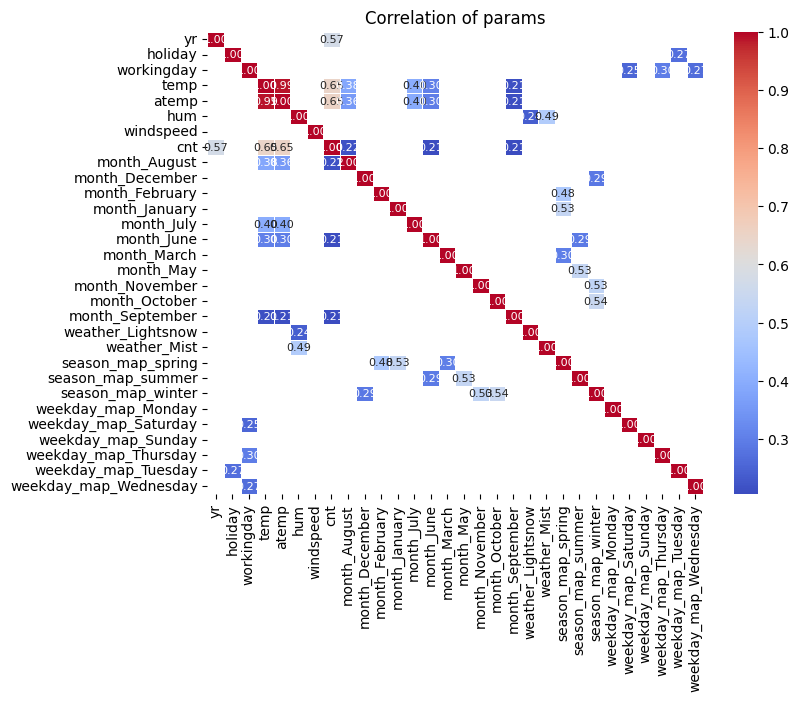


EDA : Category - yr

[365 365]


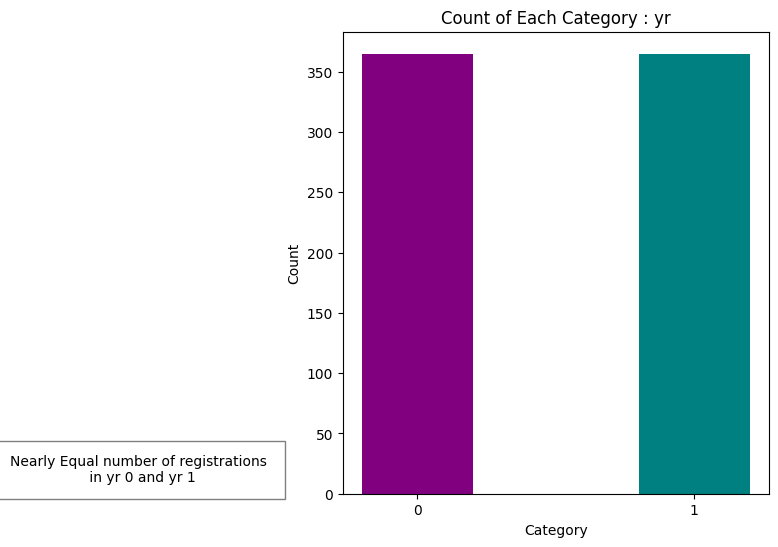



EDA : Boxplots - Temp, Atemp, Humidity and Windspeed



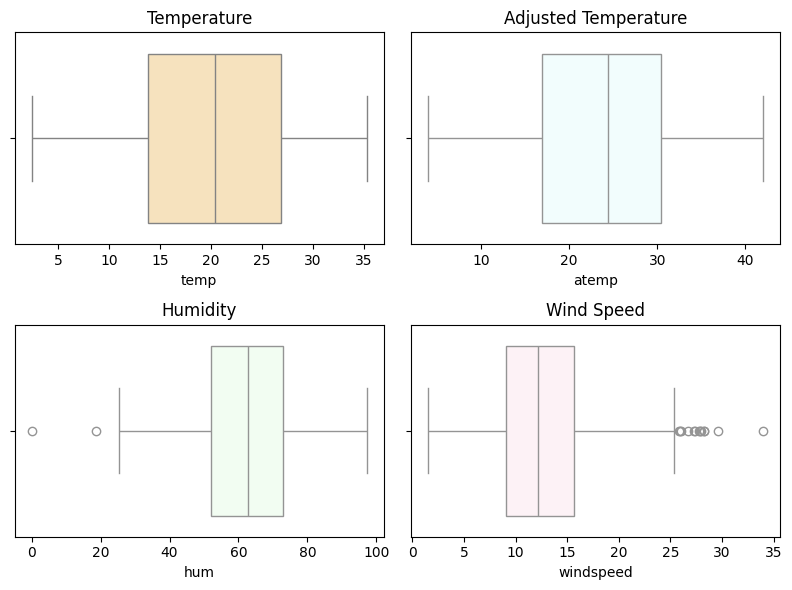




Categorical Distribution - Weekday, Month, Season and Weather



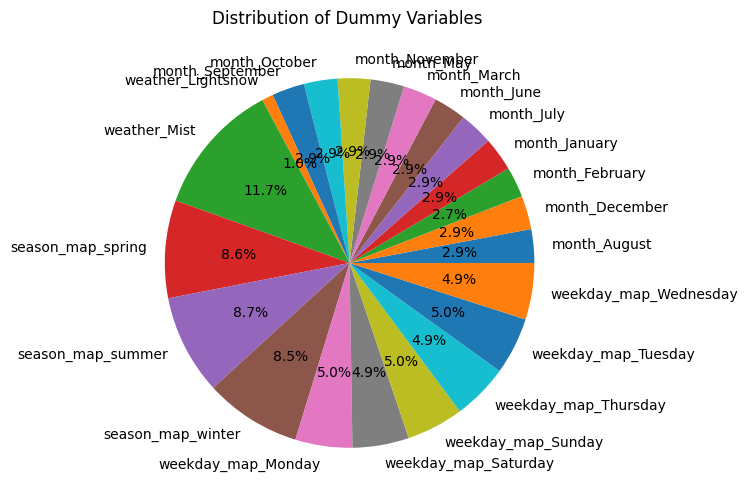




Pair-plot of Continuous features:  ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


<Figure size 800x600 with 0 Axes>

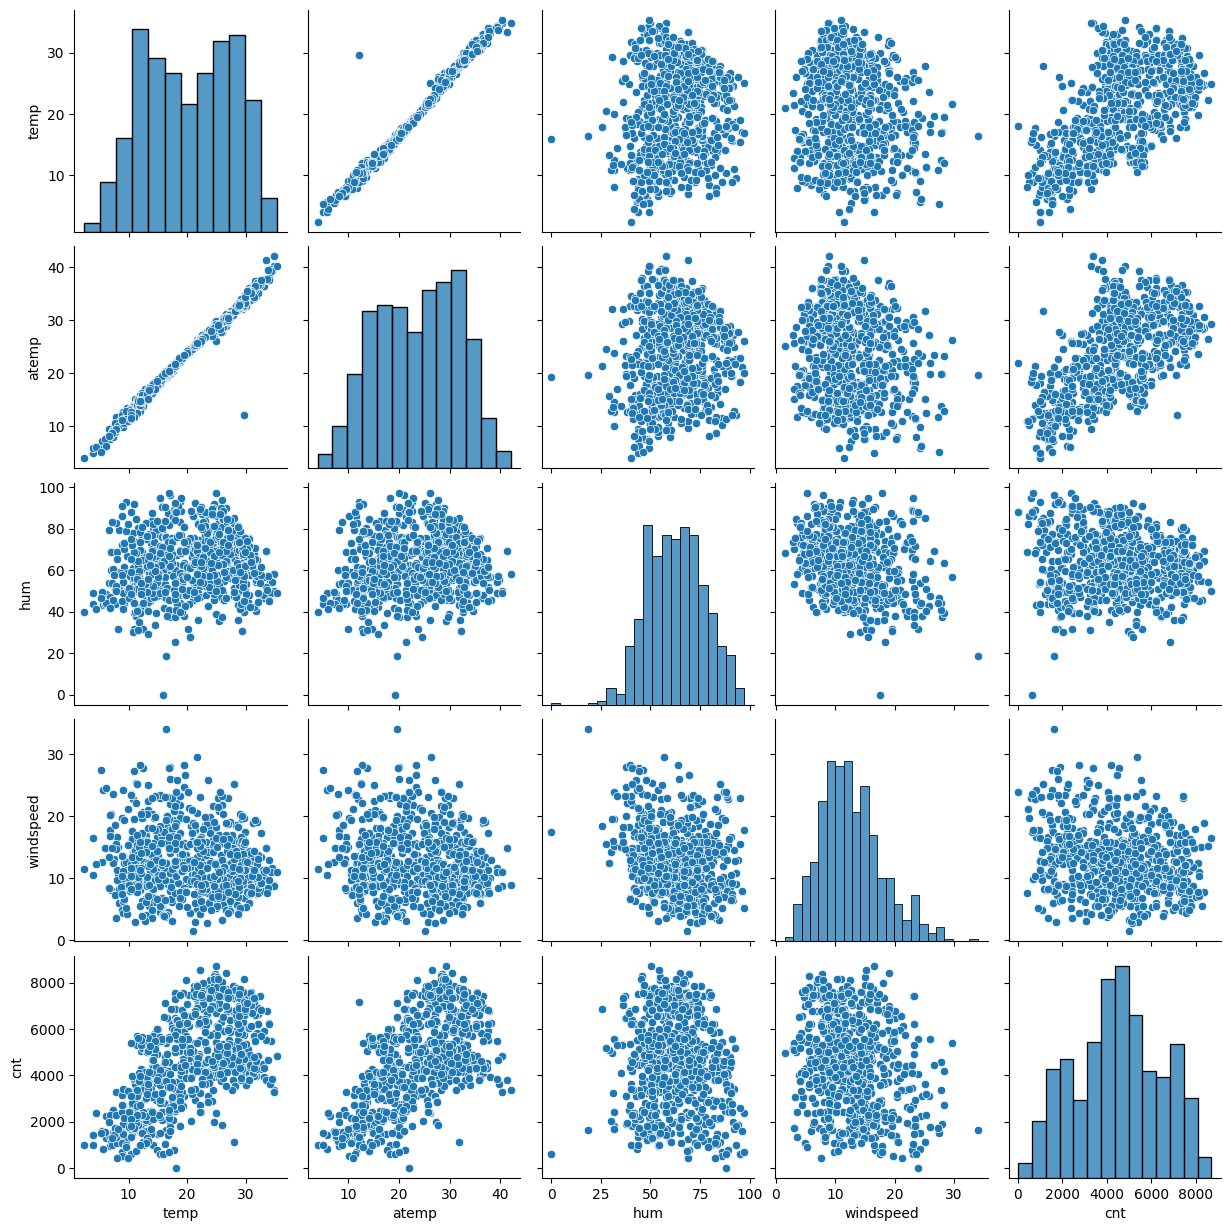

In [36]:
bike = pd.read_csv('day.csv')
EDA(bike)

#### We observe
- Total size of dataset is : 730 and 30 columns including the target feature. Train and test size is 547 and 183 respectively.
- There exists no null values
- $month_September, month_June, month_August, atemp, temp,yr$ show correlation greater than 0.2 with $cnt$
- Distribution of yr equal between two years
- Boxplots :
 - Temp and Adjusted temp have diffrent staticstical percentiles. There are no outliers in either case
 - Humiditidy has few bottom outliers
 - Windspeed has top outliers
- Pairplot : $temp$ and $atemp$ more linear relationship than $hum$ and $windspeed$ with respect to $cnt$  



## Model building and evaluation

### The funtion $model values$ takes feature list and pandas dataframe and outputs the following
- p-values of features
- VIF of the features
- r2 score and r2_adjusted score of training set
- residual distriution
- **r2 score for test set**

In [54]:
def modelvalues(values,df_):
#########################################################################################################################################

  df = map_(df_)

  print("\n")

  #creating dummy features for categorical variables
  varlist = ['month','weather','season_map','weekday_map']
  df[varlist]
  status  = pd.get_dummies(df[varlist], drop_first= True)
  varlist = ['month','weather','season_map','weekday_map']
  df = df.drop(varlist,axis=1)
  df = pd.concat([df, status] , axis=1)

  #splitting data for test and train
  df_train,df_test = train_test_split(df, train_size=0.75, random_state=100)

  #scaling the data on training set
  scaler = MinMaxScaler()
  num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

  #creating X_train and y_train
  y_train = df_train.pop('cnt')
  X_train = df_train[values]

  #Linear regression model
  X_train_sm = sm.add_constant(X_train)
  lr = sm.OLS(y_train,X_train_sm)
  lr_model = lr.fit()

  print("********************************************************LINEAR REGRESSION MODEL***************************************************************\n")

  print("Model features are : ", values)

  print("\n")

  print("**************************************************************Parameters********************************************************************************")

  print("Model feature params are : \n ", lr_model.params)

  print("\n")
  p_values = lr_model.pvalues
  formatted_p_values = p_values.apply(lambda x: '{:.3f}'.format(x))
  print("Feature p_values : \n ", formatted_p_values)
  print("\n")

  vif = pd.DataFrame()
  vif['Features'] = X_train.columns
  vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print("VIF : ")
  print(vif)
  print("\n")
  print("****************************************************************Results*************************************************************************************")
  print("\n")
  print("Training model r2 : ", lr_model.rsquared)
  print("Training model adjusted r2 : ", lr_model.rsquared_adj)

  print("\n**************************************************************Residual Analysis****************************************************************************************\n")

  y_train_pred  = lr_model.predict(X_train_sm)
  res = y_train - y_train_pred

  plt.figure(figsize=(8,4))

  sns.distplot((y_train - y_train_pred), bins=20)
  plt.title('Distribution of Residuals')
  plt.xlabel('Residuals')
  plt.ylabel('Density')
  plt.show()
  #############################################################################################

  print("\n**********************************************************Test final result****************************************************************************************\n")
  #scaling test set
  df_test[num_vars] = scaler.transform(df_test[num_vars])

  y_test = df_test.pop('cnt')
  X_test = df_test[values]
  X_test_sm = sm.add_constant(X_test)
  #predicting on test
  y_test_pred = lr_model.predict(X_test_sm)

  print("\033[1m"+"\nModel eval on test r2_score: "+"\033[0m" ,r2_score(y_true = y_test , y_pred = y_test_pred))


### First model with all features

In [59]:
varlist= [ 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'weather_Lightsnow', 'weather_Mist',
       'season_map_spring', 'season_map_summer', 'season_map_winter',
       'weekday_map_Monday', 'weekday_map_Saturday', 'weekday_map_Sunday',
       'weekday_map_Thursday', 'weekday_map_Tuesday', 'weekday_map_Wednesday']



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', 'weather_Lightsnow', 'weather_Mist', 'season_map_spring', 'season_map_summer', 'season_map_winter', 'weekday_map_Monday', 'weekday_map_Saturday', 'weekday_map_Sunday', 'weekday_map_Thursday', 'weekday_map_Tuesday', 'weekday_map_Wednesday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                    0.232006
yr                       0.230799
holiday                 -0.007458
workingday               0.093923
temp                   

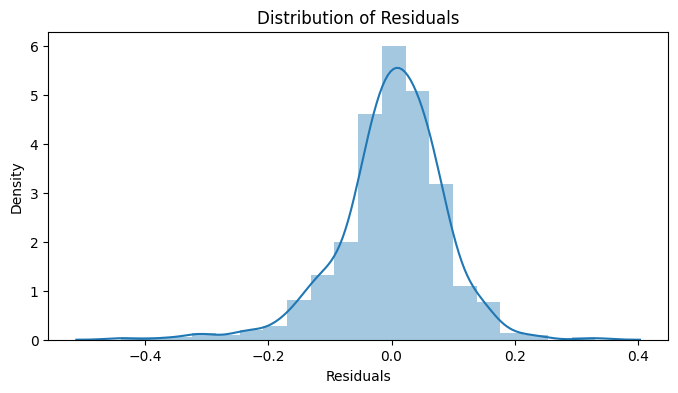


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.8103213904764294


In [60]:
bike = pd.read_csv('day.csv')

pars = [ 'yr',
         'holiday',
         'workingday',
         'weather_Mist',
         'windspeed',
         'season_map_spring',
         'weekday_map_Sunday']
modelvalues(varlist,bike)

#### Observation
- Very high p-values (above 50% statistical error): **holiday, workingday, month_October, month_June, month_March, weekday_map_Thursday, atemp**
- High p-values (above 10% statistical error): **weekday_map_Wednesday, weekday_map_Tuesday, weekday_map_Saturday, month_November, month_May, month_July, month_February, month_August**

- Very high VIF : **workingday, temp, atemp, weekday_map_Monday, weekday_map_Sunday, season_map_spring**
- High VIF : **season_map_winter, season_map_summer, month_October, month_November, month_August, month_January**

- R2 SCORE Train : Acceptable but it is safe to assume that there exists a lot of statistical insignificane
- Residual Analysis : Acceptable but it is safe to assume that there exists a lot of statistical insignificane \
- R2SCORE Test : Acceptable but it is safe to assume that there exists a lot of statistical insignificane

#### First model with RFE
An automated approach is taken to determine 10 best fit features

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [47]:
def RFE_(values,df_):
  df = map_(df_)
  varlist = ['month','weather','season_map','weekday_map']
  df[varlist]
  status  = pd.get_dummies(df[varlist], drop_first= True)
  varlist = ['month','weather','season_map','weekday_map']
  df = df.drop(varlist,axis=1)
  df = pd.concat([df, status] , axis=1)

  #splitting data for test and train
  df_train,df_test = train_test_split(df, train_size=0.75, random_state=100)

  #scaling the data on training set
  scaler = MinMaxScaler()
  num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

  #creating X_train and y_train
  y_train = df_train.pop('cnt')
  X_train = df_train[values]

  lm = LinearRegression()
  lm.fit(X_train,y_train)

  rfe = RFE(lm, n_features_to_select=10)
  rfe = rfe.fit(X_train,y_train)

  col = X_train.columns[rfe.support_]
  print("Features selected are : ",col)

In [48]:
RFE_(varlist,bike)

Features selected are :  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday',
       'weekday_map_Sunday'],
      dtype='object')


#### Observation
- from all features RFE selected the above features.

Therefore, selection of the parameters will be - if in RFE check stats significance, if not if RFE then accept statistical significant values

Feature selection (from RFE) :-
- - 'yr' (acceptable p value and acceptable vif)
 -  'holiday' (high p and acceptable vif)
 - 'working day' (acceptable p-value and high vif )
 - 'temp' (acceptable p value and high vif)
 - 'hum (acceptable p value and acceptable vif)
 - 'windspeed' (acceptable p value and acceptable vif)
 - 'weather_Lightsnow' (acceptable p value and acceptable vif)
 - 'season_map_spring' (light high p-value, light high vif)
 - 'weekday_map_Monday' (acceptable p-value and high vif)
 - 'weekday_map_Sunday'(acceptable p-value and high vif)

Feature selection (Excluding RFE) :-
- - 'weather_Mist' (acceptable p value and acceptable vif)
  

### Model with filtered features



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday', 'weekday_map_Sunday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.329214
yr                    0.229862
holiday               0.014837
workingday            0.115650
temp                  0.390737
hum                  -0.217545
windspeed            -0.197448
weather_Lightsnow    -0.202783
season_map_spring    -0.161749
weekday_map_Monday    0.074771
weekday_map_Sunday    0.123956
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.485
workingday            0.000
temp     

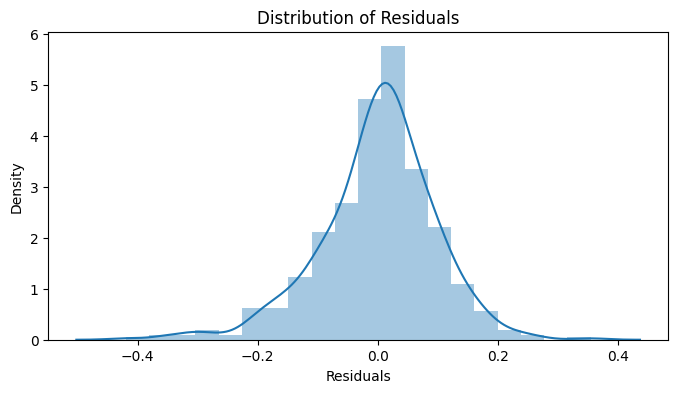


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7879420367608734


In [63]:
pars = [ 'yr',
         'holiday',
         'workingday',
         'temp',
         'hum',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
         'weekday_map_Sunday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

#### Observation

- There exists one feature with high p-value and high vif : 'holiday'
- R2 SCORE Train : **Acceptable 0.814**
- Residual Analysis : Acceptable
- R2SCORE Test : **Acceptable 0.788**

At this point is is observed that this is the correct set of features. To have a good evaluation the following combinations are chosen for testing the model

-  working & temp
- working & atemp
- holiday & temp
- holiday & atemp

The best model among the above 4 combinations will be chosen as the best model for the problem statement.


#### 1 Workingday & temp



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday', 'weekday_map_Sunday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.344051
yr                    0.229862
workingday            0.100814
temp                  0.390737
hum                  -0.217545
windspeed            -0.197448
weather_Lightsnow    -0.202783
season_map_spring    -0.161749
weekday_map_Monday    0.059935
weekday_map_Sunday    0.109119
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
workingday            0.000
temp                  0.000
hum                   0.000
windspeed             0

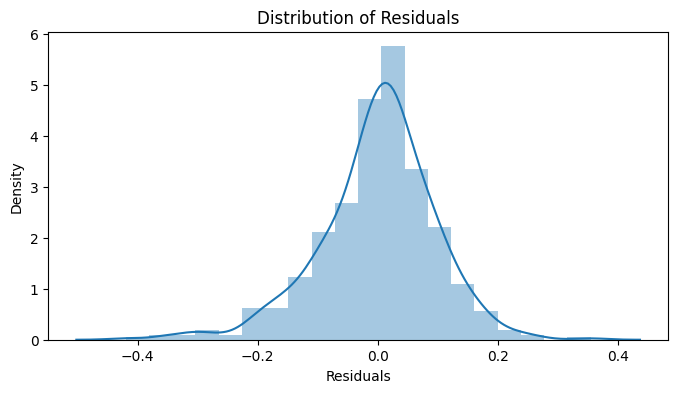


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7879420367608734


In [64]:
pars = [ 'yr',
         'workingday',
         'temp',
         'hum',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
         'weekday_map_Sunday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

#### 2 Holiday & temp



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday', 'weekday_map_Sunday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.444864
yr                    0.229862
holiday              -0.100814
temp                  0.390737
hum                  -0.217545
windspeed            -0.197448
weather_Lightsnow    -0.202783
season_map_spring    -0.161749
weekday_map_Monday   -0.040879
weekday_map_Sunday    0.008305
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.000
temp                  0.000
hum                   0.000
windspeed             0.00

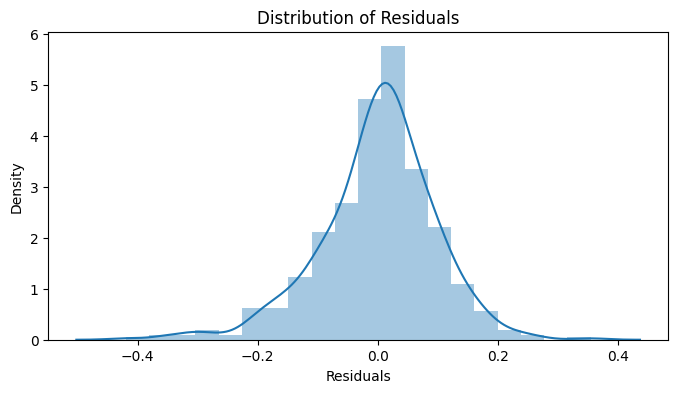


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7879420367608738


In [72]:
pars = [ 'yr',
         'holiday',
         'temp',
         'hum',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
         'weekday_map_Sunday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

#### 3 Workingday & atemp



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday', 'weekday_map_Sunday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.340685
yr                    0.230299
workingday            0.098208
atemp                 0.419449
hum                  -0.223651
windspeed            -0.184289
weather_Lightsnow    -0.197968
season_map_spring    -0.161106
weekday_map_Monday    0.056943
weekday_map_Sunday    0.106246
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
workingday            0.000
atemp                 0.000
hum                   0.000
windspeed             

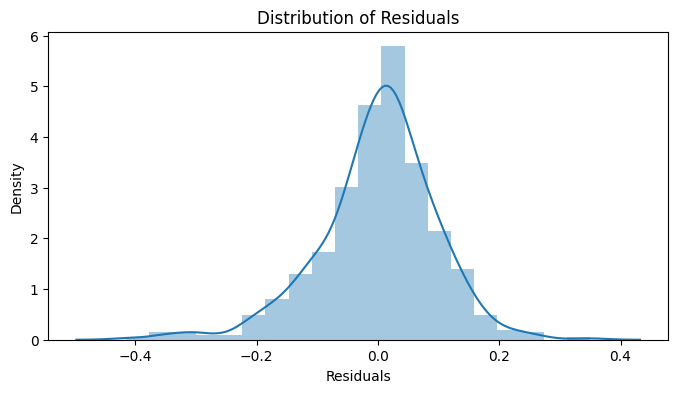


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7906322518413934


In [78]:
pars = [ 'yr',
         'workingday',
         'atemp',
         'hum',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
         'weekday_map_Sunday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

#### 4 Holiday & atemp



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday', 'weekday_map_Sunday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.438893
yr                    0.230299
holiday              -0.098208
atemp                 0.419449
hum                  -0.223651
windspeed            -0.184289
weather_Lightsnow    -0.197968
season_map_spring    -0.161106
weekday_map_Monday   -0.041265
weekday_map_Sunday    0.008038
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.000
atemp                 0.000
hum                   0.000
windspeed             0.0

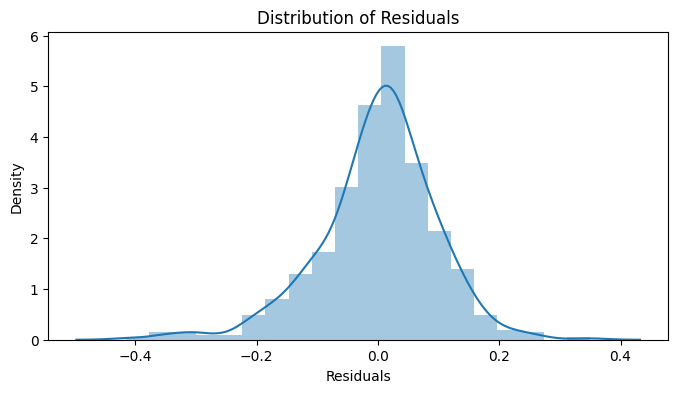


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7906322518413933


In [79]:
pars = [ 'yr',
         'holiday',
         'atemp',
         'hum',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
         'weekday_map_Sunday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

#### Looking at the 4 models and based on the respective vif and p-values we choose
- holiday & temp
- workingday & atemp

Finally, the statistically insignificant p-values and vif will be dropped to evaluate selected models

#### 1a ) from holiday& temp featured model we ***drop weekday_map_Sunday*** as it has high p value.



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.446998
yr                    0.229722
holiday              -0.102438
temp                  0.390118
hum                  -0.218160
windspeed            -0.196748
weather_Lightsnow    -0.202549
season_map_spring    -0.161835
weekday_map_Monday   -0.042416
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.000
temp                  0.000
hum                   0.000
windspeed             0.000
weather_Lightsnow     0.000
season_map_spring     0

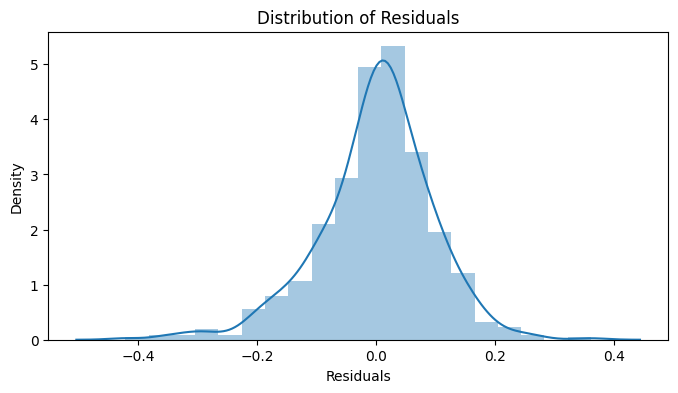


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7874634916815029


In [73]:
pars = [ 'yr',
         'holiday',
         'temp',
         'hum',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

Observation :
- No high p value
- hum high vif
-residuals acceptable
-R2 scores acceptable

#### 1b ) from holiday& temp featured model we ***drop hum*** as it has high vif.



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'temp', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday', 'weekday_map_Sunday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.289530
yr                    0.234559
holiday              -0.098895
temp                  0.382265
windspeed            -0.151069
weather_Lightsnow    -0.251298
season_map_spring    -0.153716
weekday_map_Monday   -0.040979
weekday_map_Sunday    0.010585
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.000
temp                  0.000
windspeed             0.000
weather_Lightsnow     0.000
season_map_spring     0.000
weekday_

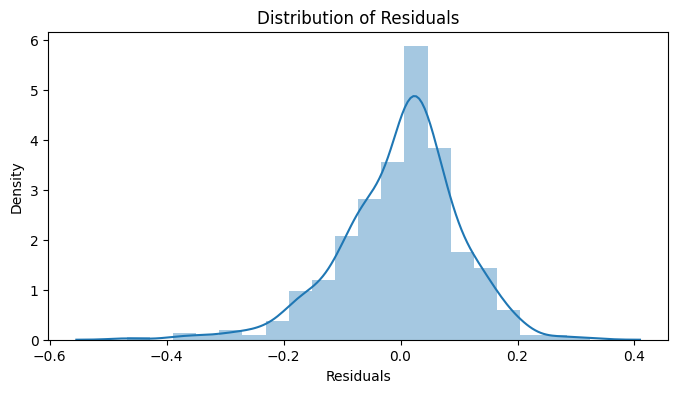


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7666319590537061


In [74]:
pars = [ 'yr',
         'holiday',
         'temp',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
         'weekday_map_Sunday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

Observation :
- weekday_map_Sunday high p value
- acceptable vifs
- residuals acceptable (slightly not normal)
- R2 scores acceptable

#### 1c ) from holiday & temp featured model we ***drop weekday_map_Sunday (as it has high p value) and hum (asit high vif)***



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'temp', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.291692
yr                    0.234397
holiday              -0.100960
temp                  0.381445
windspeed            -0.150010
weather_Lightsnow    -0.251173
season_map_spring    -0.153798
weekday_map_Monday   -0.042940
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.000
temp                  0.000
windspeed             0.000
weather_Lightsnow     0.000
season_map_spring     0.000
weekday_map_Monday    0.000
dtype: object


VIF : 
          

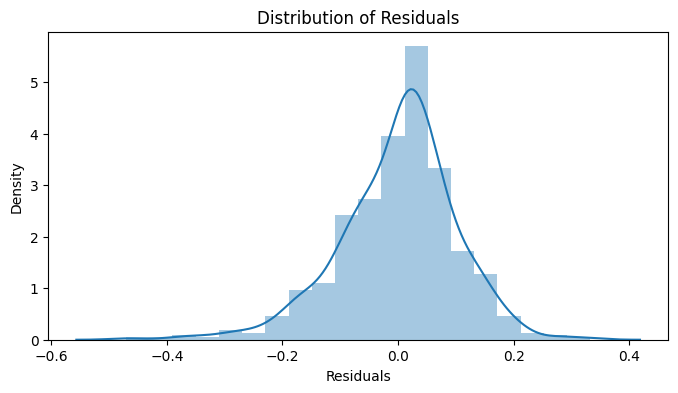


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7661088308391116


In [75]:
pars = [ 'yr',
         'holiday',
         'temp',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

Observation :
- acceptable p value
- acceptable vif
- residuals acceptable
- R2 scores acceptable

#### 2a ) from workingday & atemp featured model we drop workingday as it has high vif and hum and weekday_map_sunday



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'atemp', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.277896
yr                    0.234650
atemp                 0.412315
windspeed            -0.137576
weather_Lightsnow    -0.244733
season_map_spring    -0.154853
weekday_map_Monday   -0.039998
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
atemp                 0.000
windspeed             0.000
weather_Lightsnow     0.000
season_map_spring     0.000
weekday_map_Monday    0.001
dtype: object


VIF : 
             Features   VIF
2           windspeed  3.62
1               atemp  

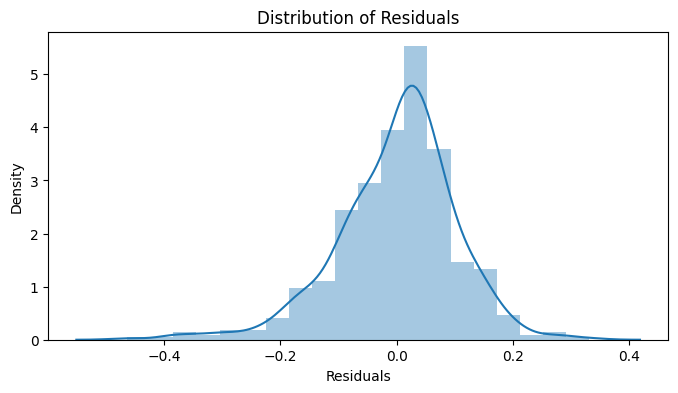


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7701961208541543


In [84]:
pars = [ 'yr',
         'atemp',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday',
]
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)

Observation :
- acceptable p values
- acceptable vifs
- residuals acceptable
- R2 scores acceptable

##Conclusion

### The final model is as follows



********************************************************LINEAR REGRESSION MODEL***************************************************************

Model features are :  ['yr', 'holiday', 'temp', 'windspeed', 'weather_Lightsnow', 'season_map_spring', 'weekday_map_Monday']


**************************************************************Parameters********************************************************************************
Model feature params are : 
  const                 0.291692
yr                    0.234397
holiday              -0.100960
temp                  0.381445
windspeed            -0.150010
weather_Lightsnow    -0.251173
season_map_spring    -0.153798
weekday_map_Monday   -0.042940
dtype: float64


Feature p_values : 
  const                 0.000
yr                    0.000
holiday               0.000
temp                  0.000
windspeed             0.000
weather_Lightsnow     0.000
season_map_spring     0.000
weekday_map_Monday    0.000
dtype: object


VIF : 
          

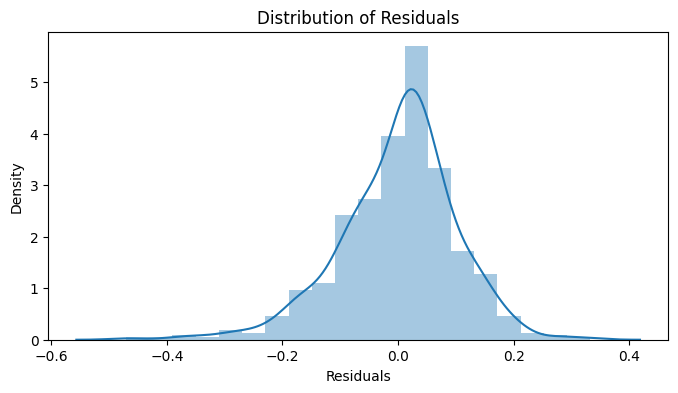


**********************************************************Test final result****************************************************************************************


Model eval on test r2_score:  0.7661088308391116


In [85]:
pars = [ 'yr',
         'holiday',
         'temp',
         'windspeed',
         'weather_Lightsnow',
         'season_map_spring',
         'weekday_map_Monday']
bike = pd.read_csv('day.csv')
modelvalues(pars,bike)